In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# load and investigate the data here:
players = pd.read_csv('tennis_stats.csv')
print(players.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [5]:
print(players.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


In [6]:
print(players.describe())

              Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon  \
count                1721.000000           1721.000000   
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.48000

In [8]:
# perform exploratory analysis here:
print(players.corr())

                                Year  FirstServe  FirstServePointsWon  \
Year                        1.000000    0.051406            -0.016728   
FirstServe                  0.051406    1.000000            -0.070659   
FirstServePointsWon        -0.016728   -0.070659             1.000000   
FirstServeReturnPointsWon  -0.106784    0.025488             0.021729   
SecondServePointsWon        0.005300    0.101417             0.320765   
SecondServeReturnPointsWon -0.039087   -0.001924            -0.004724   
Aces                       -0.108367    0.048149             0.460323   
BreakPointsConverted       -0.072404   -0.018877            -0.041538   
BreakPointsFaced           -0.101735    0.057709             0.301925   
BreakPointsOpportunities   -0.114806    0.062345             0.324853   
BreakPointsSaved           -0.006154    0.087945             0.405751   
DoubleFaults               -0.071885   -0.005477             0.373321   
ReturnGamesPlayed          -0.108405    0.071776   

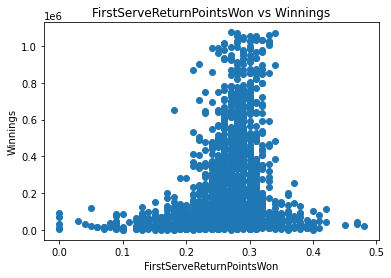

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(players['FirstServeReturnPointsWon'],players['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

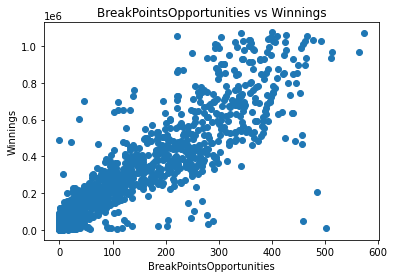

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(players['BreakPointsOpportunities'],players['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

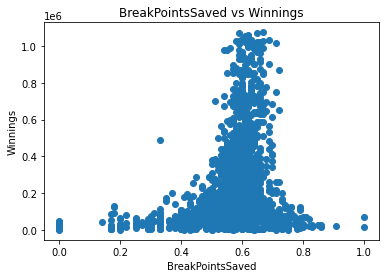

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(players['BreakPointsSaved'],players['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

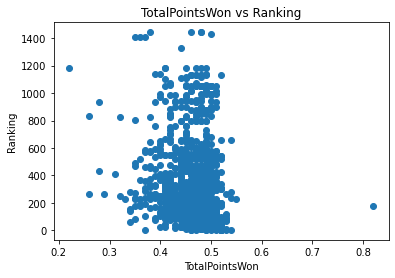

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(players['TotalPointsWon'],players['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

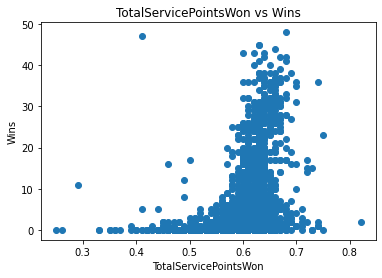

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(players['TotalServicePointsWon'],players['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

## single feature linear regression (FirstServeReturnPointsWon)

Predicting Winnings with FirstServeReturnPointsWon Test Score: 0.048518935305115196


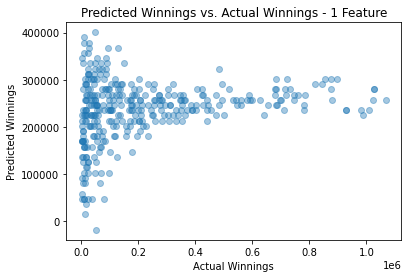

<Figure size 432x288 with 0 Axes>

In [15]:
# select features and value to predict
features = players[['FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with FirstServeReturnPointsWon Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## single feature linear regression (BreakPointsOpportunities)

Predicting Winnings with BreakPointsOpportunities Test Score: 0.84309806352994


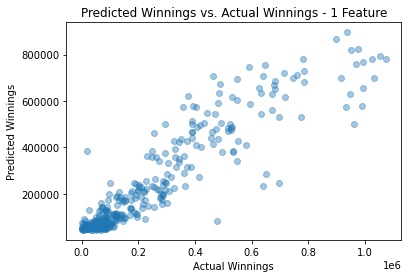

<Figure size 432x288 with 0 Axes>

In [16]:
# select features and value to predict
features = players[['BreakPointsOpportunities']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()


# perform two feature linear regressions here:


## two feature linear regression

Predicting Winnings with 2 Features Test Score: 0.8555591021171878


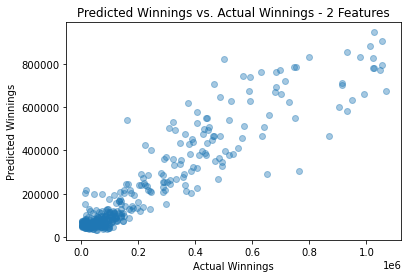

<Figure size 432x288 with 0 Axes>

In [17]:
# select features and value to predict
features = players[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

# perform multiple feature linear regressions here:

## multiple features linear regression

Predicting Winnings with Multiple Features Test Score: 0.7609080721511815


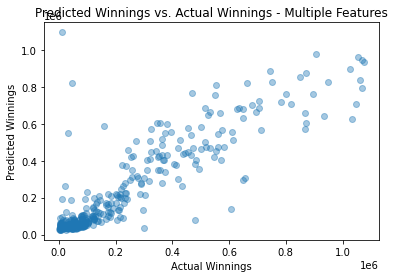

<Figure size 432x288 with 0 Axes>

In [18]:
# select features and value to predict
features = players[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()
